In [1]:
import src
import os
import numpy as np
import sys
import re
import math
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:/Users/pkicsiny/Desktop/TUM/3/ADL4CV/ADL4CV_project/models')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.listdir(sys.path[0])

['baseline_2-1',
 'lstm_2-1',
 'sgan_2-1',
 'sgan_2-1_iw',
 'sgan_2-1_w',
 'tgan_2-1',
 'tgan_2-1_iw',
 'unet_2-1']

In [24]:
which_scores = "_intensity_scores"

In [25]:
scores = {}
for model in os.listdir(sys.path[0]):
    try:
        scores[model] = np.load(sys.path[0]+"/"+model+"/"+model+which_scores+".npy")
    except:
        pass

In [26]:
scores.keys()

dict_keys(['baseline_2-1', 'sgan_2-1', 'sgan_2-1_iw', 'sgan_2-1_w', 'tgan_2-1', 'tgan_2-1_iw'])

In [36]:
result["baseline_2-1"]

,corr_to_input,corr_to_truth,csi,far,pod
pred_1,0.859001,0.892185,0.699694,0.226497,0.876161
pred_2,0.792512,0.834191,0.619884,0.295840,0.833543
pred_3,0.748088,0.779650,0.557437,0.348198,0.788175
pred_4,0.727241,0.730077,0.509372,0.385978,0.742875
pred_5,0.703666,0.685588,0.468535,0.419164,0.700563


In [30]:
result = {}
for model in scores.keys():
    result[model] = pd.DataFrame(
        data=[pd.DataFrame(scores[model].item()[key]).mean() for key in scores[model].item().keys()],
        index=scores[model].item().keys())#.groupby(['corr_to_input', 'corr_to_truth'])

In [31]:
n = 5

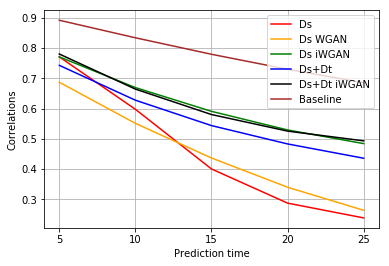

In [32]:
fig, ax1 = plt.subplots(1,1)
#ax1.plot(result["sgan_2-1"].reset_index()["corr_to_input"][:n], label="Ds", linestyle='--',c="r")
ax1.plot(result["sgan_2-1"].reset_index()["corr_to_truth"][:n], label="Ds", c="red")

#ax1.plot(result["sgan_2-1_w"].reset_index()["corr_to_input"][:n], label="Ds WGAN", linestyle='--',c="orange")
ax1.plot(result["sgan_2-1_w"].reset_index()["corr_to_truth"][:n], label="Ds WGAN", c="orange")

#ax1.plot(result["sgan_2-1_iw"].reset_index()["corr_to_input"][:n], label="Ds iWGAN", linestyle='--',c="g")
ax1.plot(result["sgan_2-1_iw"].reset_index()["corr_to_truth"][:n], label="Ds iWGAN", c="green")

#ax1.plot(result["tgan_2-1"].reset_index()["corr_to_input"][:n], label="Ds+Dt", linestyle='--',c="b")
ax1.plot(result["tgan_2-1"].reset_index()["corr_to_truth"][:n], label="Ds+Dt", c="blue")

#ax1.plot(result["tgan_2-1_iw"].reset_index()["corr_to_input"][:n], label="Ds+Dt iWGAN", linestyle='--',c="k")
ax1.plot(result["tgan_2-1_iw"].reset_index()["corr_to_truth"][:n], label="Ds+Dt iWGAN", c="black")

#ax1.plot(result["baseline_2-1"].reset_index()["corr_to_input"][:n], label="Baseline", linestyle='--',c="k")
ax1.plot(result["baseline_2-1"].reset_index()["corr_to_truth"][:n], label="Baseline", c="brown")
ax1.grid()
plt.xticks(np.arange(0, n, 1))
ax1.set_xticklabels(list(map(str,5*np.arange(0,len(result['sgan_2-1']))+5)))
ax1.set_xlabel("Prediction time")
ax1.set_ylabel("Correlations")
ax1.legend(loc="upper right")
plt.savefig("input_intensity_corrs")

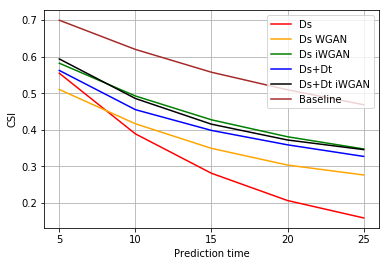

In [33]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"].reset_index()["csi"][:n], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"].reset_index()["csi"][:n], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"].reset_index()["csi"][:n], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"].reset_index()["csi"][:n], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"].reset_index()["csi"][:n], label="Ds+Dt iWGAN",c="k")
ax2.plot(result["baseline_2-1"].reset_index()["csi"][:n], label="Baseline",c="brown")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("CSI")
ax2.grid()
plt.xticks(np.arange(0, n, 1))
ax2.set_xticklabels(list(map(str,5*np.arange(0,len(result['sgan_2-1']))+5)))
ax2.legend()
plt.savefig("csi")

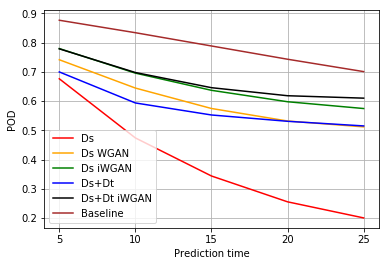

In [34]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"].reset_index()["pod"][:n], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"].reset_index()["pod"][:n], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"].reset_index()["pod"][:n], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"].reset_index()["pod"][:n], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"].reset_index()["pod"][:n], label="Ds+Dt iWGAN",c="k")
ax2.plot(result["baseline_2-1"].reset_index()["pod"][:n], label="Baseline",c="brown")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("POD")
ax2.grid()
plt.xticks(np.arange(0, n, 1))
ax2.set_xticklabels(list(map(str,5*np.arange(0,len(result['sgan_2-1']))+5)))
ax2.legend()
plt.savefig("pod")

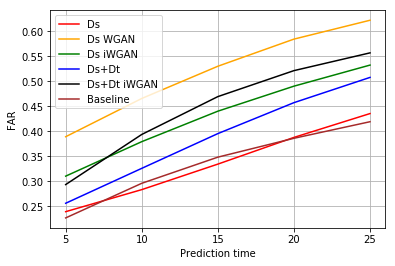

In [35]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"].reset_index()["far"][:n], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"].reset_index()["far"][:n], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"].reset_index()["far"][:n], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"].reset_index()["far"][:n], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"].reset_index()["far"][:n], label="Ds+Dt iWGAN",c="k")
ax2.plot(result["baseline_2-1"].reset_index()["far"][:n], label="Baseline",c="brown")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("FAR")
ax2.grid()
plt.xticks(np.arange(0, n, 1))
ax2.set_xticklabels(list(map(str,5*np.arange(0,len(result['sgan_2-1']))+5)))
ax2.legend()
plt.savefig("far")